In [1]:
import pandas as pd
import os
import warnings
import seaborn as sns
from matplotlib import pyplot as plt

# Config
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set()

movies = pd.read_csv("Movie-Ratings.csv")
movies.columns = ["Film", "Genre", "CriticRating", "AudienceRating", "BudgetMillions", "Year"]

# Set column as a Category
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')

# Set Year as a Category...
# we don't want Python to treat this as a number when applying mean, max or min analysis
movies.Year = movies.Year.astype('category')

# List all categories within column
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

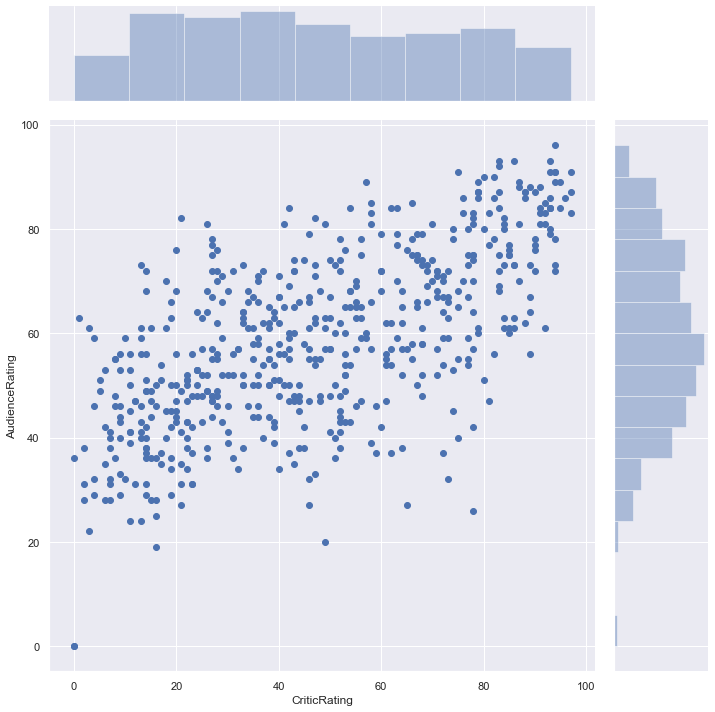

In [2]:
# Create a joint-plot
j = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating", height=10)

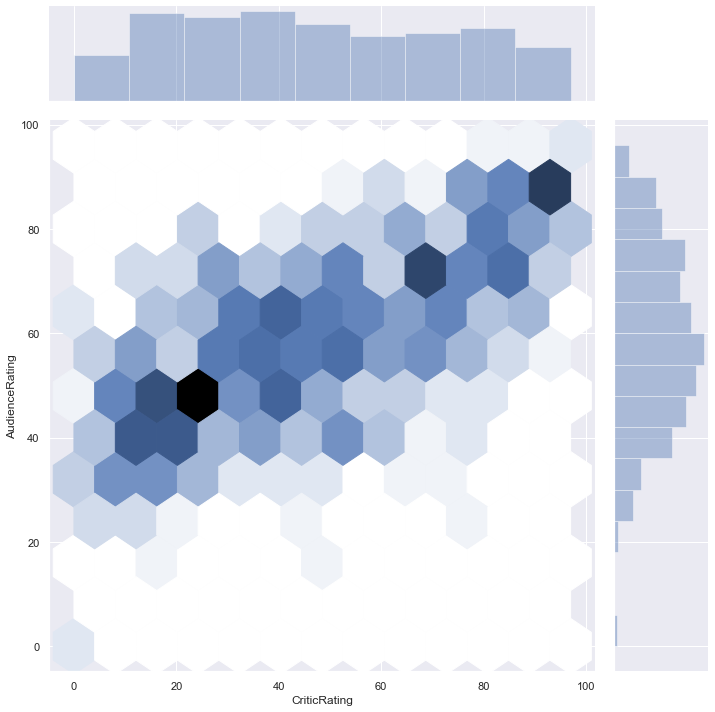

In [3]:
# Same data visualized as a hex
h = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating", height=10, kind="hex")

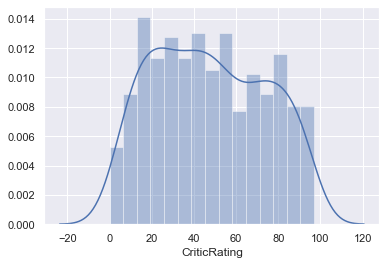

In [4]:
# Seaborn visualization of a distribution
s = sns.distplot(movies.CriticRating, bins=15)

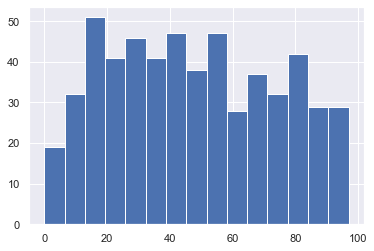

In [5]:
# Matplotlib default visualization of a distribution
hist = plt.hist(movies.CriticRating, bins=15)

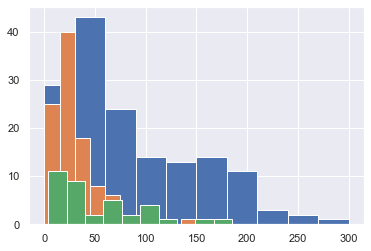

In [9]:
# Show a visualization of budget by genre
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions)
plt.show()

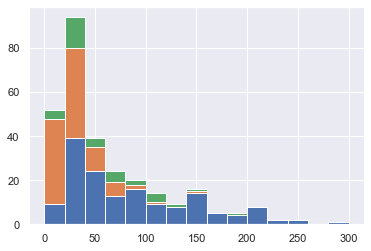

In [15]:
# Show stacked histogram
genres = [movies[movies.Genre == 'Action'].BudgetMillions,
          movies[movies.Genre == 'Drama'].BudgetMillions,
          movies[movies.Genre == 'Thriller'].BudgetMillions]
plt.hist(genres, bins=15, stacked=True)
plt.show()

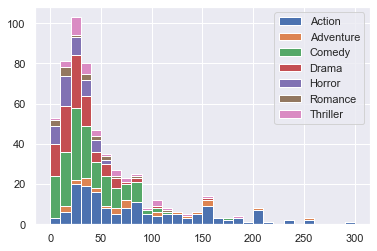

In [22]:
# Automate stacked histogram
budgets = []
labels = []
for gen in movies.Genre.cat.categories:
    budgets.append(movies[movies.Genre == gen].BudgetMillions)
    labels.append(gen)
    
m = plt.hist(budgets, bins=30, stacked=True, rwidth=1, label=labels, )
plt.legend()
plt.show()